In [1]:
# 14-1.계층적 군집분석
# 분석 시나리오

# A쇼핑은 RFM 기반의 고객세분화를 수행하고자 500명의 고객을 무작위로 샘플링 하여 
# Recency, Frequency, Monetary 세 가지 변수를 통한 계층적 군집분석을 진행하고자 한다.

In [2]:
# 1-1. 모듈 및 데이터 탑재
import pandas as pd
from scipy.cluster.hierarchy import linkage

df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
data_temp = df.sample(n=500, random_state=111) 
X = data_temp[['Recency','Frequency','Monetary']]


# 1-2. 계층적 군집분석
cluster= linkage(X, method = 'average', metric='euclidean') 
print(cluster[490:])

[[969.         979.           2.43557142  72.        ]
 [978.         988.           2.60070576  33.        ]
 [984.         991.           2.78913055  40.        ]
 [981.         989.           3.05800305 374.        ]
 [986.         990.           3.11871825  81.        ]
 [161.         993.           3.55293738 375.        ]
 [994.         995.           3.67802103 456.        ]
 [987.         992.           3.97824721  44.        ]
 [996.         997.           6.01862823 500.        ]]


In [4]:
# 여기에서는 평균연결법, 유클리디언 거리 측정 방식으로 계층적 군집분석을 수행

# 코드 실행 결과, 군집화 일정표의 하위 9개의 행이 출력된 것을 확인할 수 있다.
# 순서대로 1~2열은 병합되는 군집 번호, 3열은 군집간 거리, 4열은 군집에 속한 개체 수이다.
# 일정표 끝에서 2번째 단계의 군집간 거리가 3.978에서 마지막 단계인 6.01로 약 66% 증가하였기 때문에
# 2개의 군집으로 나누는 것이 적절하다고 볼 수 있다.

# 앞서 생성한 군집화 일정표를 바탕으로 적절한 군집 수를 파악하기 위해 덴드로그램을 그려보았음
# 참고 url : https://swrush.tistory.com/704

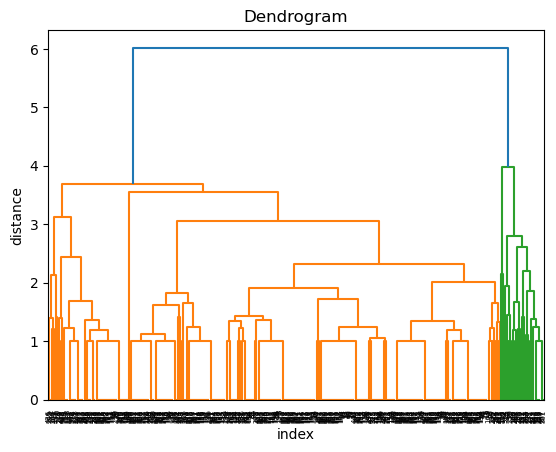

In [5]:
# 1-3. 덴드로그램
# 1. 모듈 불러오기
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 2 덴드로그램 그리기
%matplotlib inline
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster)
plt.show()

In [6]:
# 결과
# 덴드로그램을 보면 후보 군집의 개수는 가지의 길이(거리)가 긴 2개 또는 3개 군집을 선택할 수 있다.
# 단순히 가지의 길이(거리)로만 보면 군집의 수는 2개로 결정하는 것이 올바르나,
# 해당 문제의 경우 RFM을 중심으로 고객세분화를 하는 것이 목적이므로 
# 2개보다는 3개의 그룹으로 고객들을 관리하는 것이 마케팅 관점에서 더욱 유용할 수 있다.
# 이처럼 계층적 군집분석의 결과는 기계적으로 해석하기 보다는 실무적인 관점에서 융통성을 갖고 판단하는 것이 필요하다.

In [7]:
# 14-2. 비계층적 군집분석
# k-평균 군집분석

In [8]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from sklearn.cluster import KMeans
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
X = df[['Recency','Frequency','Monetary']] 

#2. 비계층적 군집분석
model = KMeans(n_clusters=3, max_iter=20, random_state=19).fit(X) 
X['cluster_id'] = model.labels_ 

#3. 군집별 고객 수 확인
clu1 = X[X.cluster_id==0]
clu2 = X[X.cluster_id==1]
clu3 = X[X.cluster_id==2]
print('군집1의 고객 수\n',clu1.cluster_id.count())
print('군집2의 고객 수\n',clu2.cluster_id.count())
print('군집3의 고객 수\n',clu3.cluster_id.count())

#4. 군집별 평균 RFM 확인
print('군집1의 RFM평균\n',clu1.Recency.mean(),clu1.Frequency.mean(),clu1.Monetary.mean())
print('군집2의 RFM평균\n',clu2.Recency.mean(),clu2.Frequency.mean(),clu2.Monetary.mean())
print('군집3의 RFM평균\n',clu3.Recency.mean(),clu3.Frequency.mean(),clu3.Monetary.mean())

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


군집1의 고객 수
 512
군집2의 고객 수
 77
군집3의 고객 수
 411
군집1의 RFM평균
 6.8359375 3.212890625 2.892578125
군집2의 RFM평균
 1.7792207792207793 3.207792207792208 3.7532467532467533
군집3의 RFM평균
 6.9391727493917275 4.600973236009732 5.768856447688565


C:\Users\USER\AppData\Local\Temp\ipykernel_9496\2273136349.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_id'] = model.labels_


In [9]:
# 결과
# k-평균 군집분석 결과 k의 수를 지정한 대로 총 3개의 군집으로 결과가 나타났다.
# 계층적 군집분석과 다르게 군집의 수를 미리 지정해주었기 때문에 3개의 군집에 대한 프로파일 정보를 간단히 확인할 수 있다.
# 군집의 규모에서는 군집1 > 군집3 > 군집2의 순서로 나타났으며,
# 군집별 3가지 변수의 평균을 보았을 때 군집3이 우량고객 그룹이라는 것을 알 수 있다.
# Monetary와 Frequency 변수의 평균값을 보았을 때 군집1과 군집2는 매우 유사한 그룹으로 보이지만
# Recency 값이 매우 큰 차이를 보이고 있으므로
# 군집2는 최근에 구매이력이 없는 잠재 이탈고객 그룹으로 보는 것이 타당할 것이다.